In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cityblock, euclidean, cosine


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [5]:
df_aa_eq_freq_all = pd.read_csv('../viral_spectra/aminoacid_eq_freq_all_virus.csv')
df_aa_freq_all = pd.read_csv('../viral_spectra/aminoacid_freq_all_virus.csv')

In [6]:
df_aa_eq_freq_sarscov2 = pd.read_csv('../viral_spectra/aminoacid_eq_freq_sars_cov2.csv')

In [7]:
df_aa_eq_freq_sarscov2

,taxid,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,2697049,0.002044,0.016945,0.003724,0.000872,0.453163,0.000782,0.009731,0.119522,0.005127,...,0.003392,0.021885,0.005341,0.00228,0.002916,0.058378,0.012011,0.020914,0.000577,0.099586


In [8]:
df_aa_eq_freq_all['taxid'] = df_aa_eq_freq_all['taxid'].astype(int)
df_aa_eq_freq_sarscov2['taxid'] = df_aa_eq_freq_sarscov2['taxid'].astype(int)

In [9]:
df_aa_freq_all[~df_aa_freq_all['taxid'].isin(df_aa_eq_freq_all['taxid'])]

,taxid,refseq_id,M,L,K,V,N,Q,A,I,...,S,G,T,D,R,H,W,E,C,X
2,11320,GCF_000865725.1,0.039465,0.081437,0.061808,0.055126,0.053247,0.038839,0.057214,0.064940,...,0.075799,0.065358,0.062644,0.043850,0.067237,0.017749,0.016496,0.074963,0.018167,0.0
10,12814,GCF_002815455.1,0.023344,0.110271,0.075367,0.052690,0.072921,0.032014,0.042463,0.089373,...,0.080925,0.040907,0.074033,0.049133,0.037128,0.025789,0.008226,0.051578,0.018230,0.0
16,186538,GCF_000848505.1,0.016749,0.100856,0.052066,0.053887,0.046059,0.050428,0.061715,0.059530,...,0.076643,0.056800,0.076097,0.051338,0.052066,0.029674,0.013654,0.055343,0.016384,0.0
19,2697049,GCF_009858895.2,0.022051,0.096473,0.059227,0.081419,0.054067,0.036469,0.068344,0.051452,...,0.067496,0.059368,0.075129,0.051028,0.033995,0.018659,0.011096,0.048131,0.030674,0.0
22,3052310,GCF_000851705.1,0.028724,0.117856,0.066627,0.060113,0.050044,0.039088,0.048268,0.057744,...,0.084987,0.055375,0.053006,0.057744,0.047972,0.022801,0.011253,0.060113,0.025466,0.0
27,38525,GCF_002989735.1,0.028678,0.099091,0.061786,0.070646,0.052460,0.032175,0.064118,0.065750,...,0.081371,0.056890,0.071112,0.047097,0.054092,0.016787,0.011425,0.058988,0.025414,0.0


In [10]:
df_aa_eq_freq_all[~df_aa_eq_freq_all['taxid'].isin(df_aa_freq_all['taxid'])]

,taxid,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
2,113201,0.024011,0.018362,0.031522,0.049200,0.028642,0.030145,0.025108,0.105047,0.131746,...,0.020867,0.084410,0.019125,0.039188,0.073211,0.068976,0.064296,0.047022,0.007793,0.04917
3,113202,0.028012,0.011864,0.030102,0.055831,0.013933,0.028842,0.029237,0.084439,0.166349,...,0.016476,0.089689,0.027207,0.054226,0.083844,0.062998,0.083463,0.033870,0.005530,0.03535


In [12]:
df_type = pd.read_csv('../viral_spectra/taxid_virus_type.csv', index_col='Unnamed: 0')
df_type['taxname'] = df_type['species'].str.split('__').str[0]
df_type.loc[38, ['taxid', 'Type', 'taxname']] = [11320, '-', 'Influenza A virus']
df_type.loc[39, ['taxid', 'Type', 'taxname']] = [2697049, '+', 'Sars-cov-2']
df_type['taxid'] = df_type['taxid'].astype(int)

In [13]:
df_type.head()

,taxid,species,host,gene,comment,Type,taxname
0,38170,Avian orthoreovirus__38170,NaN,NaN,NaN,ds,Avian orthoreovirus
1,1157337,Piscine orthoreovirus__1157337,NaN,NaN,NaN,ds,Piscine orthoreovirus
2,351073,Mammalian orthoreovirus__351073,NaN,NaN,NaN,ds,Mammalian orthoreovirus
3,40054,Epizootic hemorrhagic disease virus__40054,NaN,NaN,NaN,ds,Epizootic hemorrhagic disease virus
4,10990,Rice black streaked dwarf virus__10990,Avena sativa,P1 protein,NaN,ds,Rice black streaked dwarf virus


In [14]:
ex_taxids = [12814, 186538, 3052310, 38525]

In [15]:
# df_aa_eq_freq_all[df_aa_eq_freq_all['taxid'].isin([113201, 113202])].set_index('taxid').mean()

In [16]:
df_aa_eq_freq_all.loc[30] = df_aa_eq_freq_all[df_aa_eq_freq_all['taxid'].isin([113201, 113202])].set_index('taxid').mean()

In [17]:
df_aa_eq_freq_all.loc[30, 'taxid'] = 11320

In [18]:
df_aa_eq_freq_filtered = df_aa_eq_freq_all.drop(2).drop(3)
df_aa_eq_freq_filtered = pd.concat([df_aa_eq_freq_filtered, df_aa_eq_freq_sarscov2])
df_aa_eq_freq_filtered['taxid'] = df_aa_eq_freq_filtered['taxid'].astype(int)
df_aa_eq_freq_filtered = df_aa_eq_freq_filtered.set_index('taxid')
df_aa_eq_freq_filtered['X'] = 0

df_aa_freq_filtered = df_aa_freq_all.set_index('taxid').drop(['refseq_id'], axis=1)

In [19]:
df_aa_eq_freq_filtered.head()

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,Y,X
taxid,,,,,,,,,,,,,,,,,,,,,
10990,0.013954,0.034301,0.013994,0.006222,0.211905,0.008021,0.024345,0.113975,0.015683,0.180426,...,0.035272,0.024275,0.010825,0.020176,0.100198,0.035170,0.049553,0.004332,0.086453,0
11082,0.049888,0.036130,0.034785,0.038470,0.041609,0.066067,0.026266,0.063355,0.042655,0.103472,...,0.038569,0.037670,0.029049,0.088358,0.092238,0.055315,0.076087,0.018948,0.040060,0
1133363,0.017771,0.016706,0.017881,0.014777,0.070370,0.007244,0.043867,0.126259,0.066617,0.133009,...,0.080612,0.043598,0.036251,0.032548,0.092736,0.080118,0.030513,0.002506,0.075317,0
1157337,0.051590,0.031605,0.024551,0.016560,0.056918,0.029388,0.043098,0.061605,0.023167,0.131302,...,0.034344,0.090565,0.029071,0.068150,0.117459,0.072170,0.052925,0.008887,0.044213,0
118655,0.025078,0.020685,0.033687,0.053506,0.029393,0.037680,0.022421,0.100955,0.123816,0.082320,...,0.077954,0.016691,0.035612,0.078585,0.069322,0.058032,0.053541,0.009914,0.047867,0


In [20]:
df_aa_freq_filtered.head()

,M,L,K,V,N,Q,A,I,Y,P,...,S,G,T,D,R,H,W,E,C,X
taxid,,,,,,,,,,,,,,,,,,,,,
10990,0.024014,0.101132,0.066222,0.061991,0.070771,0.032265,0.039141,0.070983,0.042526,0.034486,...,0.090976,0.037554,0.056702,0.062097,0.041680,0.024331,0.007405,0.056702,0.015762,0.0
11082,0.032028,0.087427,0.056481,0.078338,0.037654,0.024670,0.081800,0.050422,0.024886,0.041117,...,0.060593,0.088293,0.074659,0.044579,0.057996,0.020558,0.026401,0.059944,0.020342,0.0
11320,0.039465,0.081437,0.061808,0.055126,0.053247,0.038839,0.057214,0.064940,0.027772,0.039048,...,0.075799,0.065358,0.062644,0.043850,0.067237,0.017749,0.016496,0.074963,0.018167,0.0
1133363,0.031650,0.088671,0.074353,0.048480,0.056267,0.036925,0.049485,0.090681,0.044712,0.034665,...,0.077367,0.041949,0.061291,0.054760,0.040944,0.025119,0.011052,0.055514,0.030394,0.0
1157337,0.029342,0.094342,0.042105,0.076842,0.044474,0.034868,0.072763,0.058947,0.031579,0.053421,...,0.080526,0.061711,0.073947,0.062368,0.053026,0.018553,0.015132,0.043421,0.013421,0.0


## Observed frequency vs Equilibrium frequency

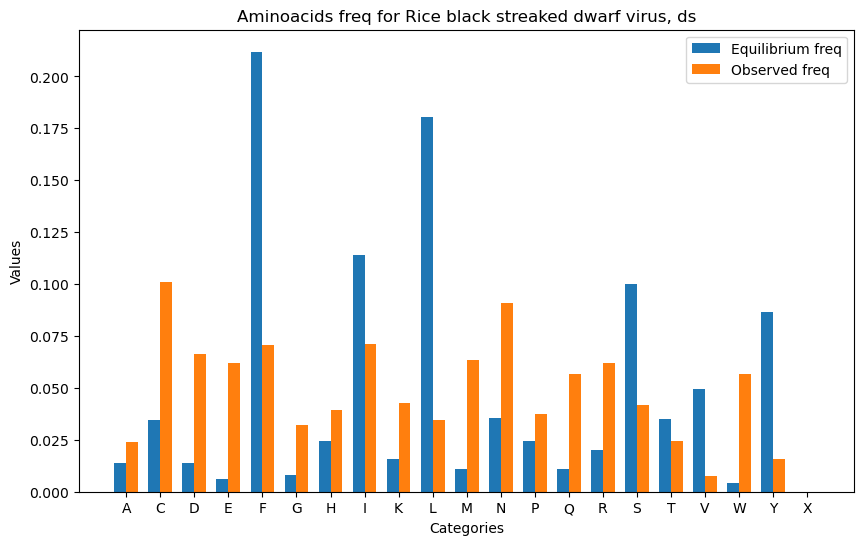

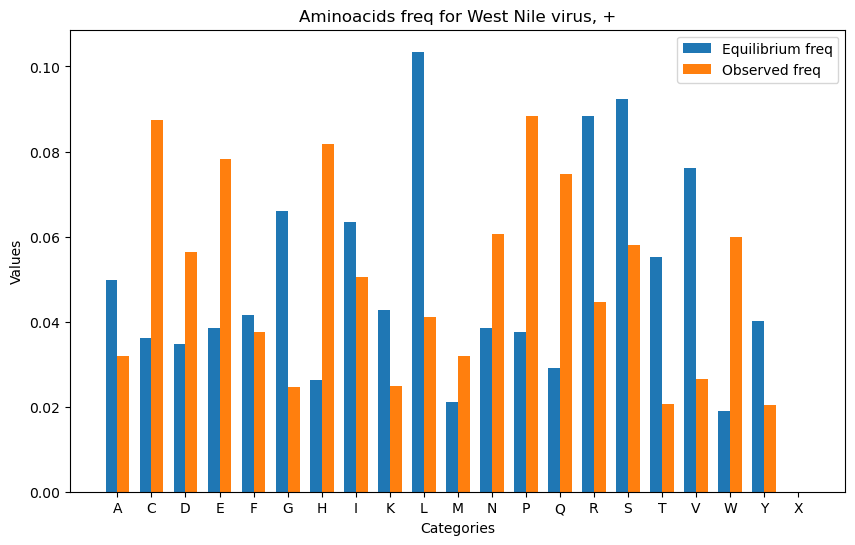

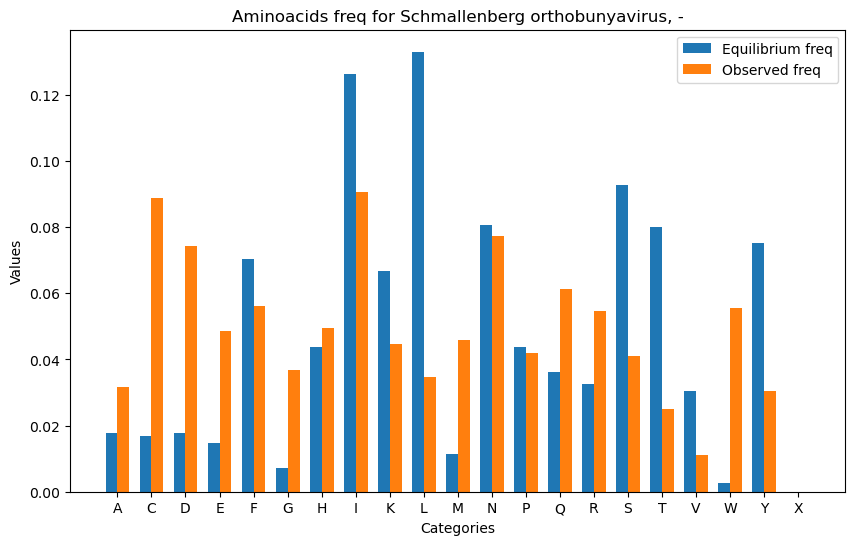

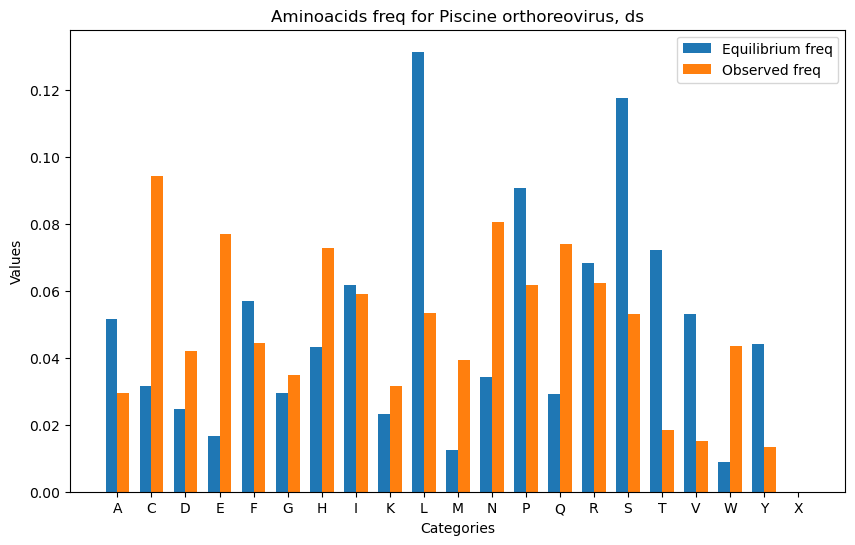

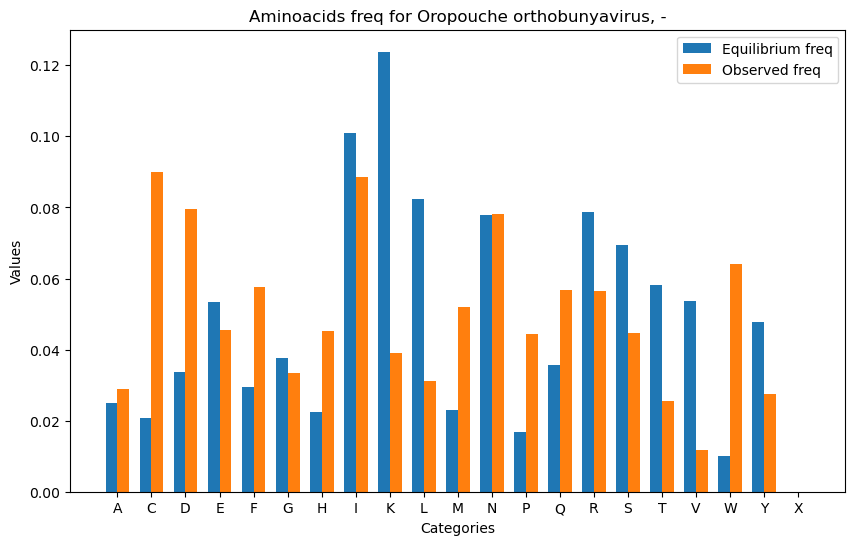

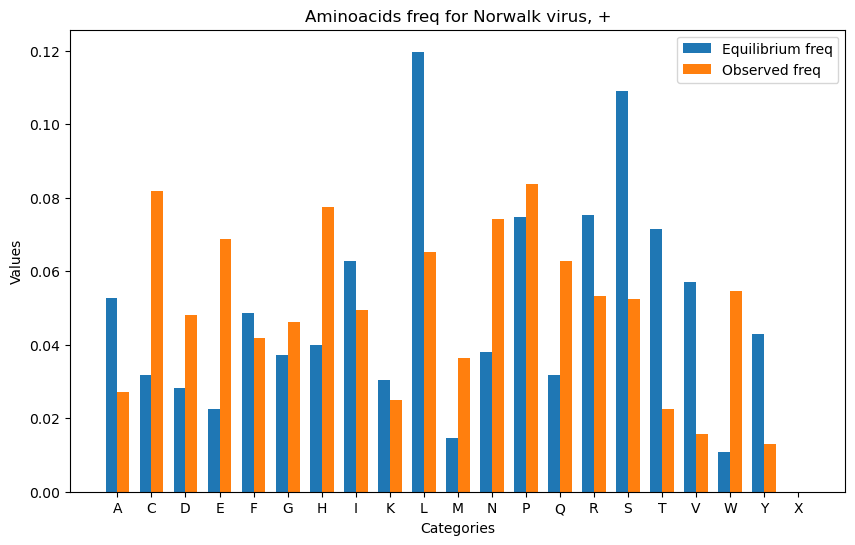

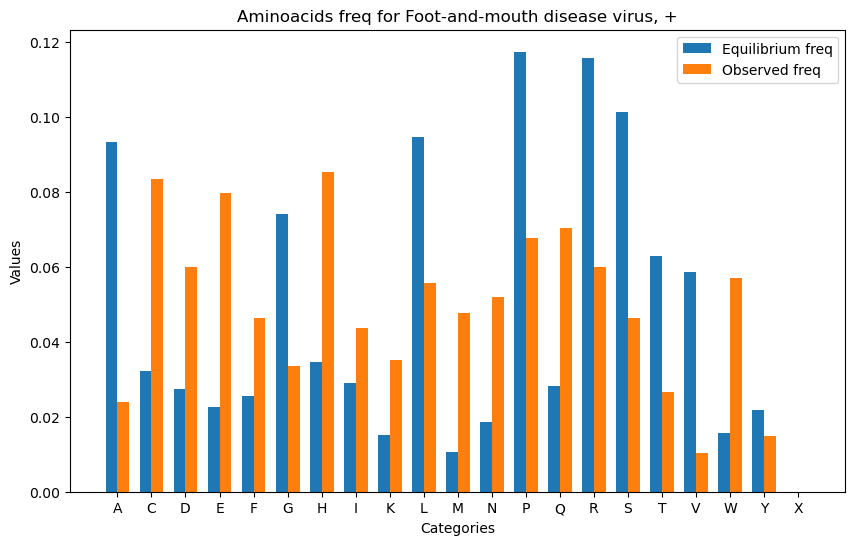

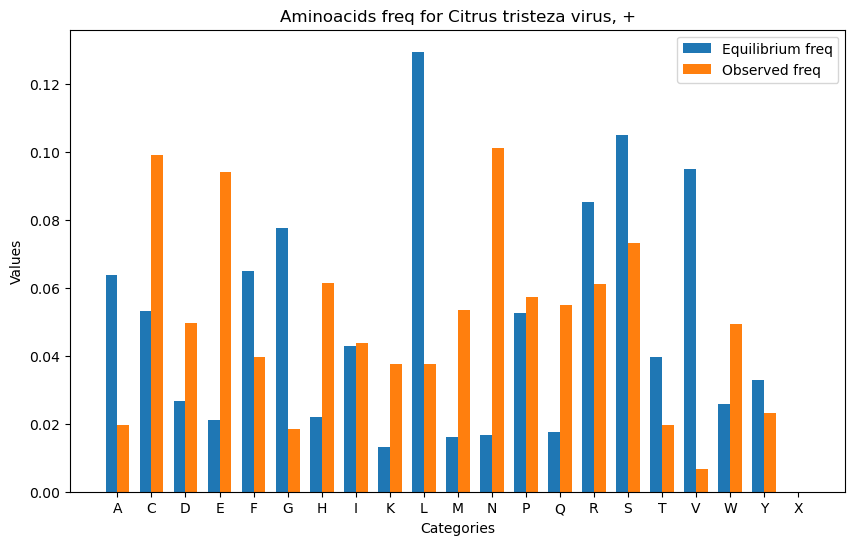

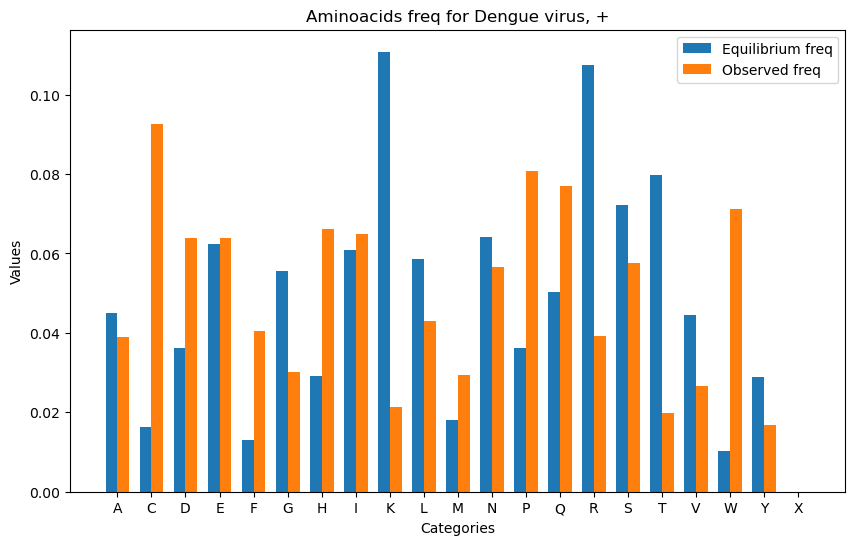

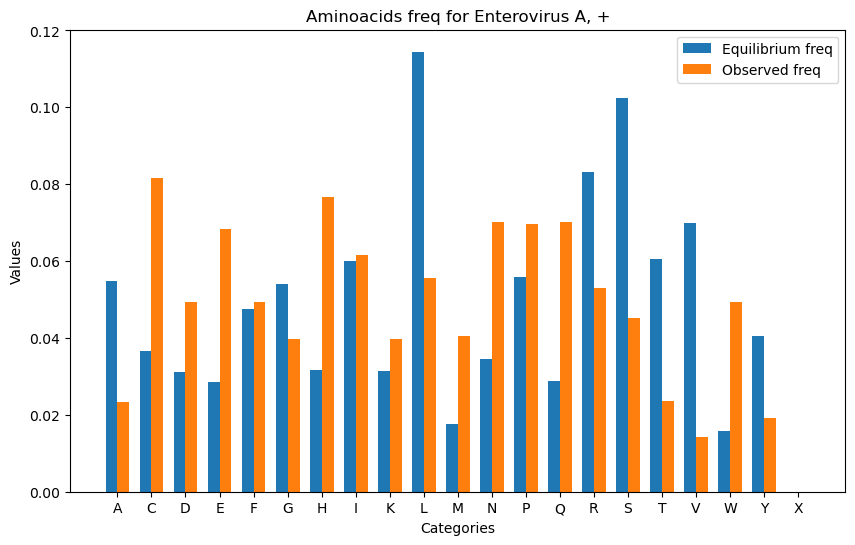

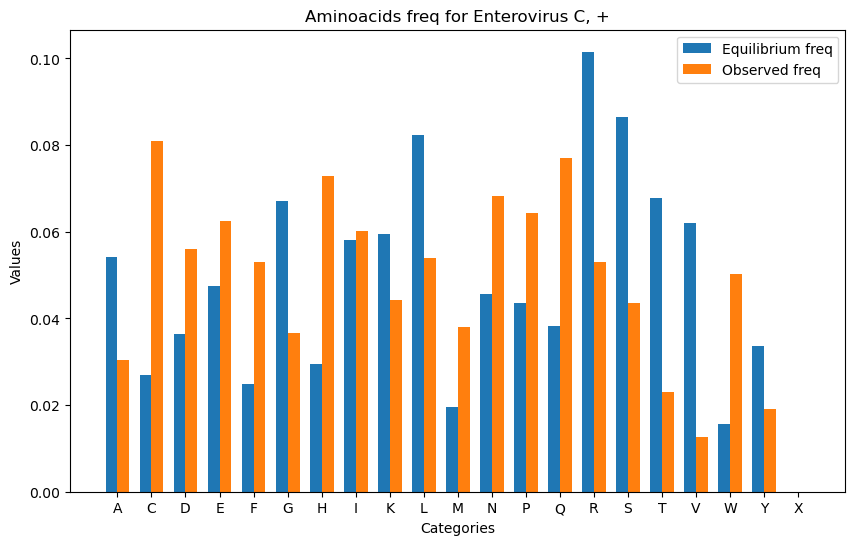

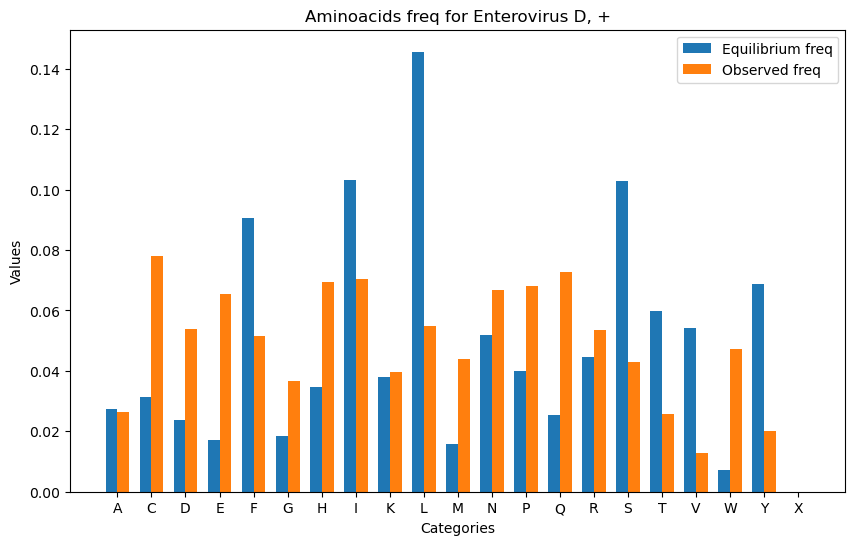

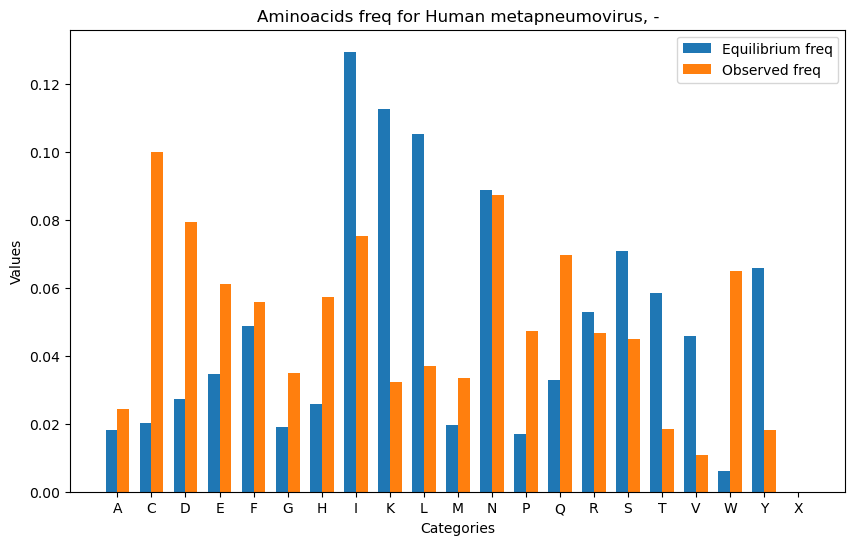

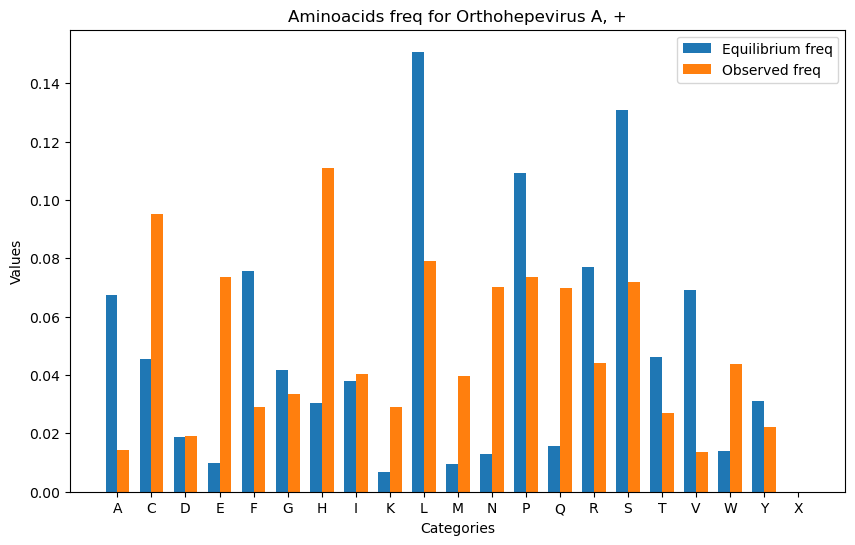

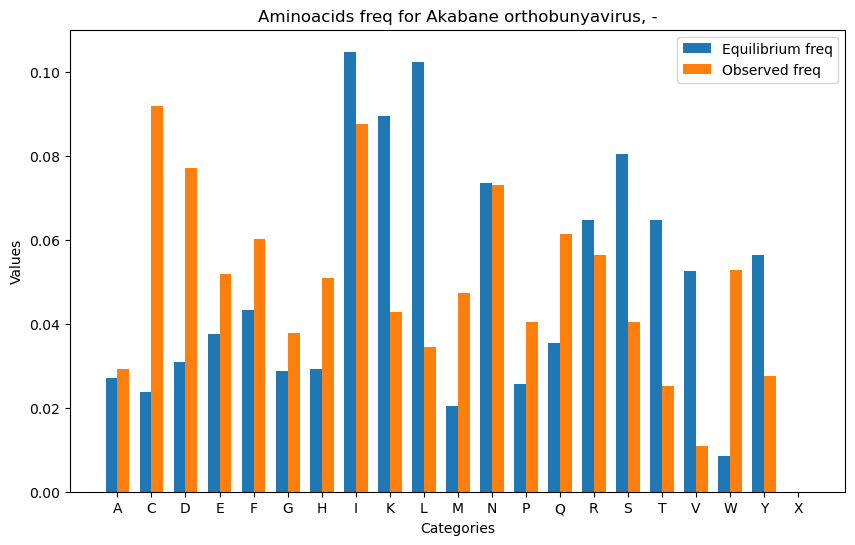

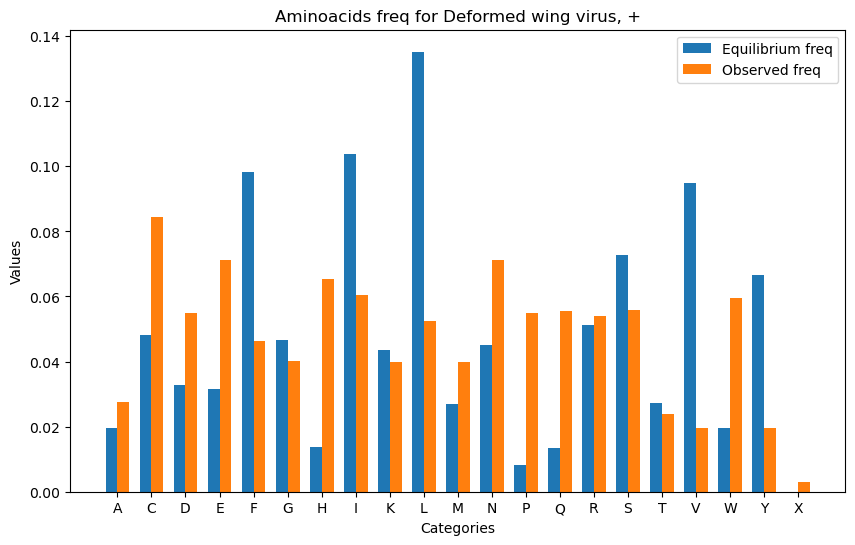

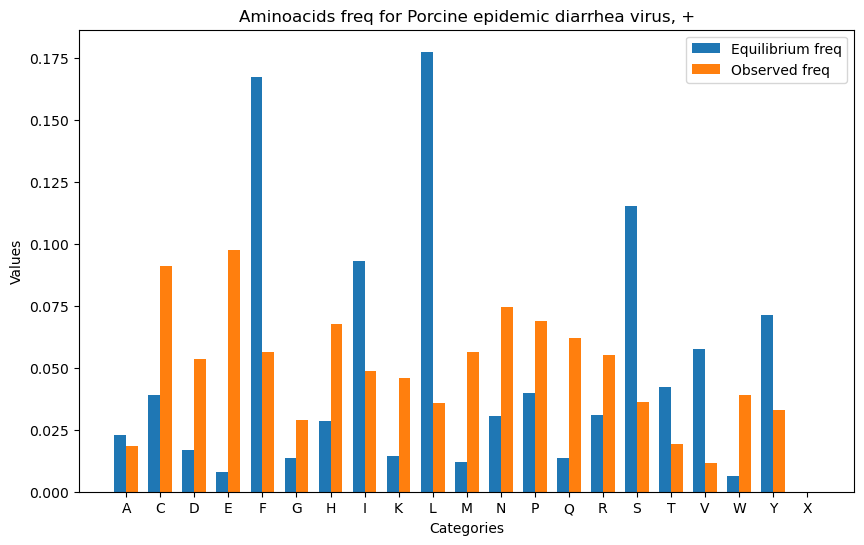

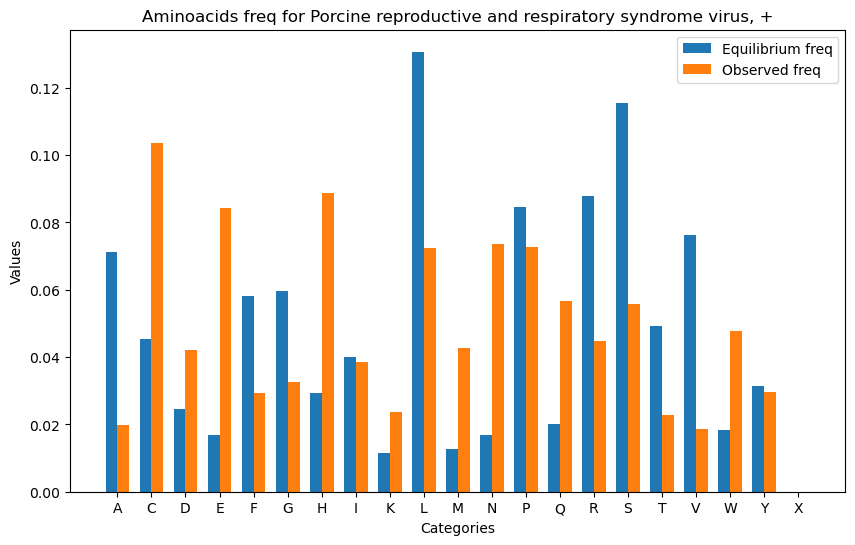

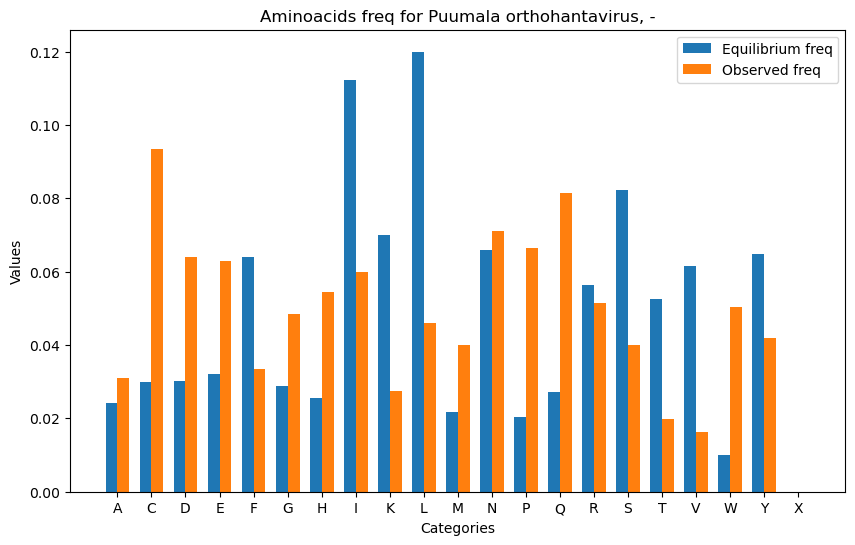

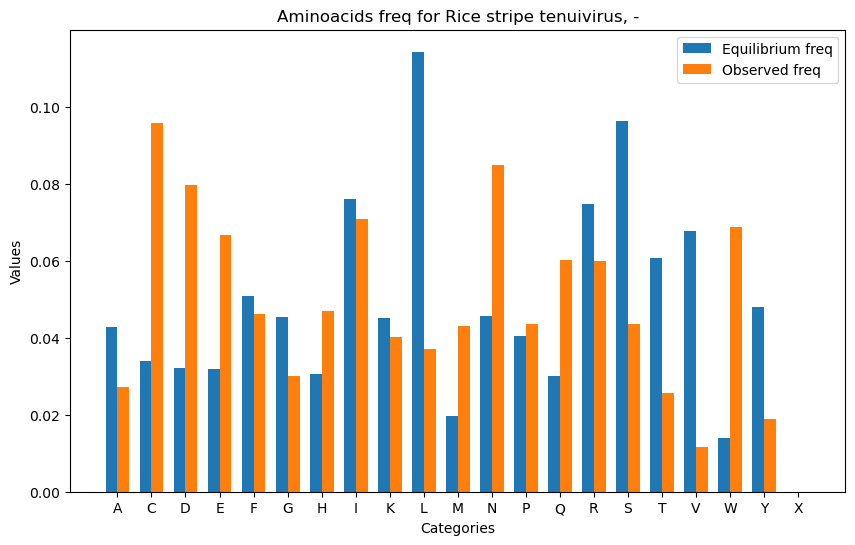

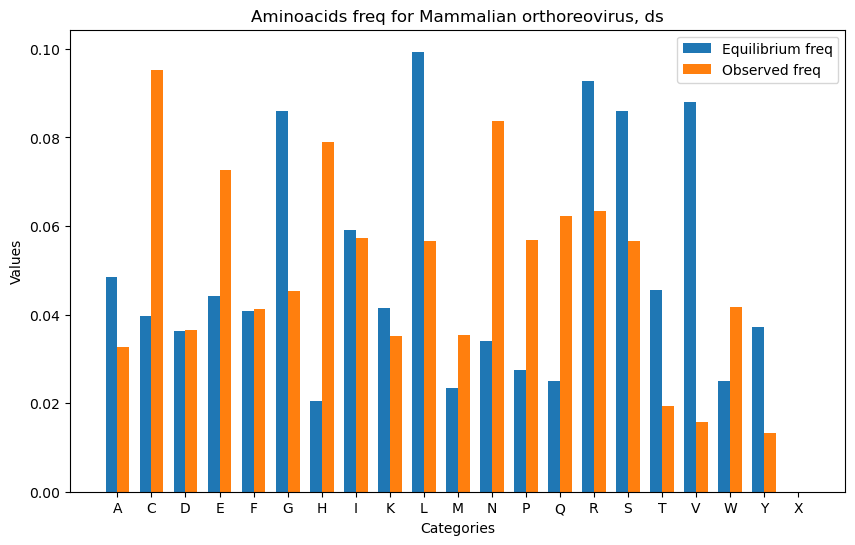

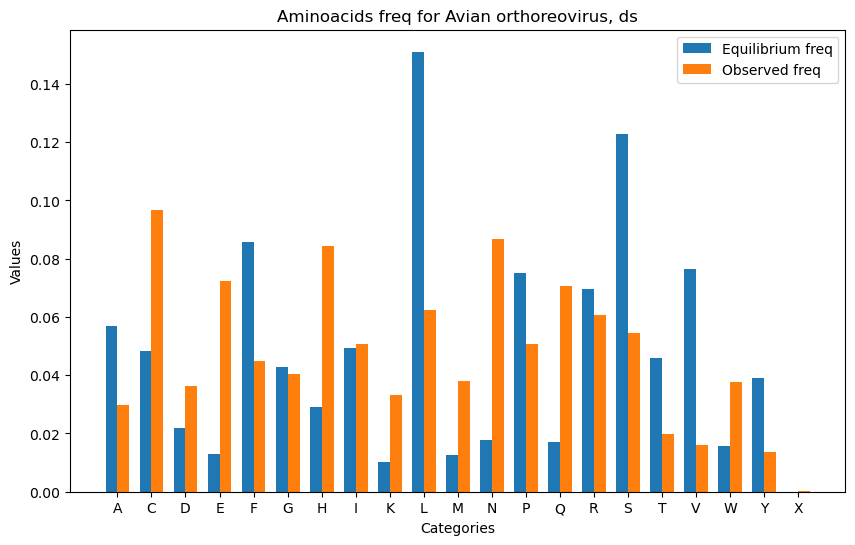

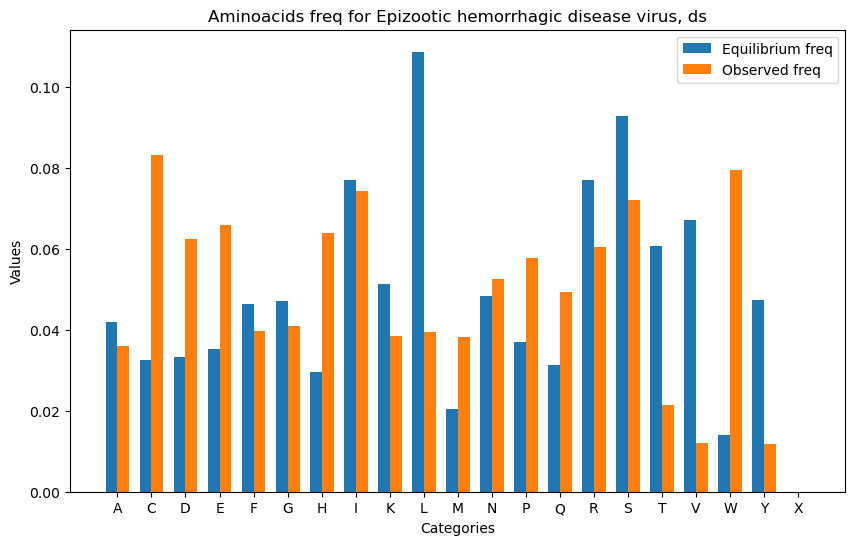

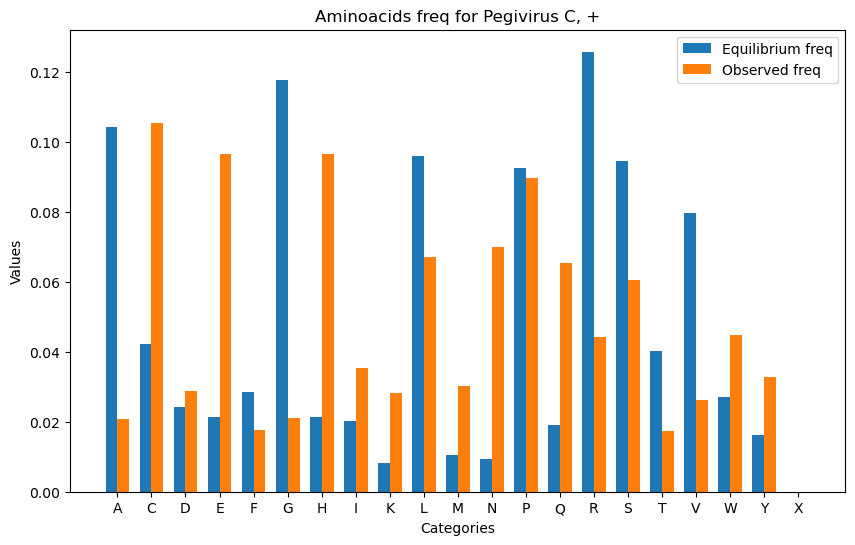

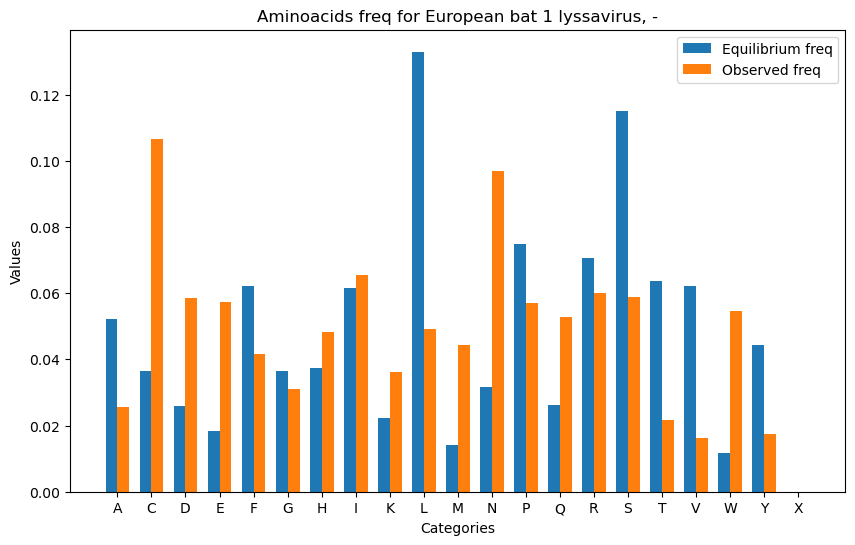

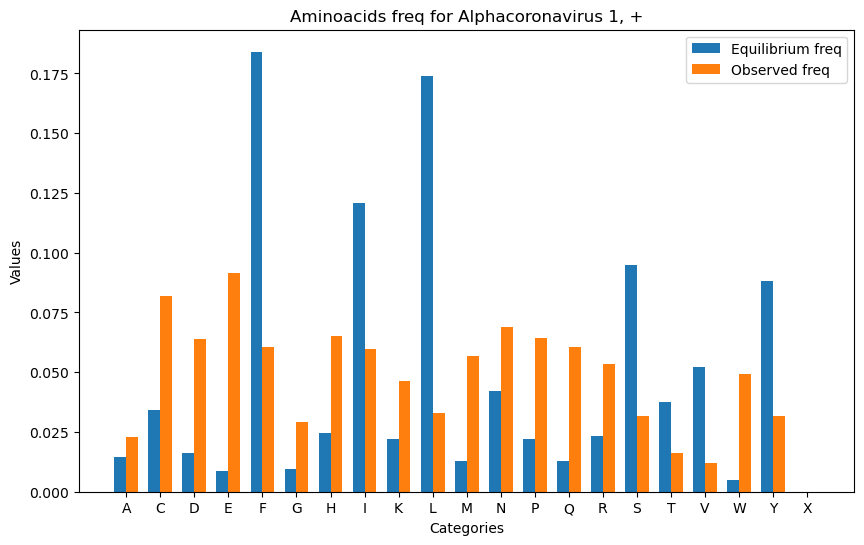

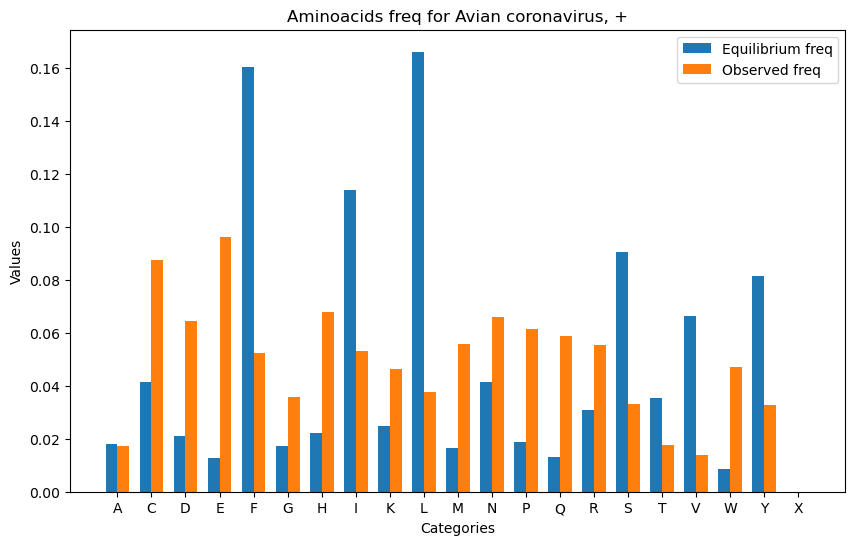

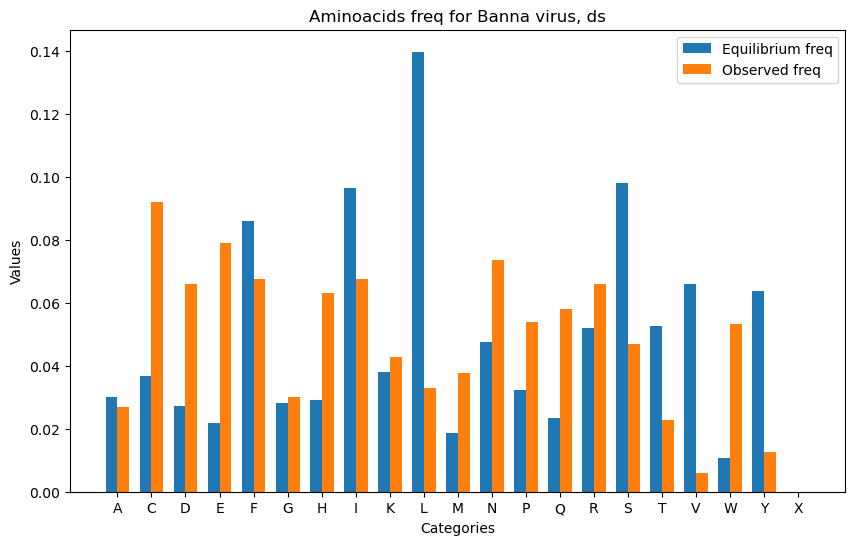

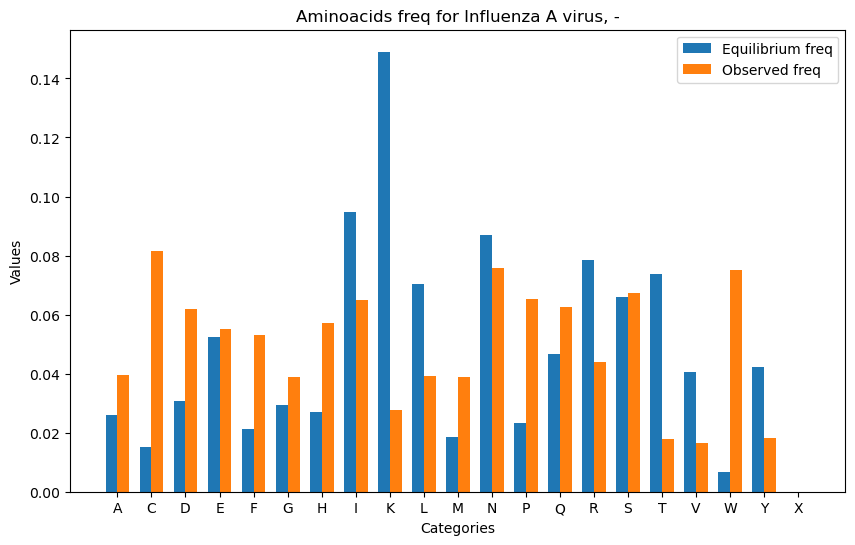

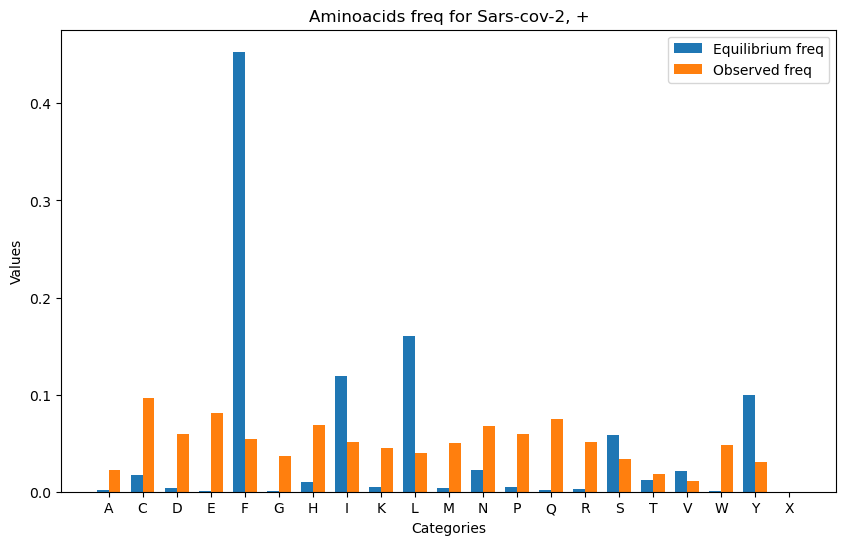

In [21]:
for taxid in df_aa_eq_freq_filtered.index:
    
    taxname = df_type[df_type['taxid'] == taxid]['taxname'].values[0]
    type = df_type[df_type['taxid'] == taxid]['Type'].values[0]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Значения первого набора данных
    indices = np.arange(len(df_aa_eq_freq_filtered.columns))
    bar_width = 0.35
    bars1 = ax.bar(indices, df_aa_eq_freq_filtered.loc[taxid], bar_width, label='Equilibrium freq')
    
    # Значения второго набора данных
    bars2 = ax.bar(indices + bar_width, df_aa_freq_filtered.loc[taxid], bar_width, label='Observed freq')
    
    ax.set_xlabel('Categories')
    ax.set_ylabel('Values')
    ax.set_title(f"Aminoacids freq for {taxname}, {type}")
    ax.set_xticks(indices + bar_width / 2)
    ax.set_xticklabels(df_aa_eq_freq_filtered.columns)
    ax.legend()
    
    plt.show()
    # fig.savefig(f'../viral_spectra/figures/aa_freqs_plot_{taxid}.pdf')

In [22]:
# sort columns
df_aa_eq_freq_filtered = df_aa_eq_freq_filtered.reindex(sorted(df_aa_eq_freq_filtered.columns), axis=1)
df_aa_freq_filtered = df_aa_freq_filtered.reindex(sorted(df_aa_freq_filtered.columns), axis=1)

In [23]:
manhattan_distance = []
euclidean_distance = []
cosine_distance = []

for taxid in df_aa_eq_freq_filtered.index:
    manhattan_distance.append(cityblock(df_aa_eq_freq_filtered.loc[taxid], df_aa_freq_filtered.loc[taxid]))
    euclidean_distance.append(euclidean(df_aa_eq_freq_filtered.loc[taxid], df_aa_freq_filtered.loc[taxid]))
    cosine_distance.append(cosine(df_aa_eq_freq_filtered.loc[taxid], df_aa_freq_filtered.loc[taxid]))
    

In [24]:
df_aa_distance = pd.DataFrame([manhattan_distance, euclidean_distance, cosine_distance])\
                                .T\
                                .set_index(df_aa_eq_freq_filtered.index)\
                                .rename(columns={0:'manhat_d', 1:'euclid_d', 2:'cosine_d'})

In [25]:
df_aa_distance = df_aa_distance.join(df_type.set_index('taxid')[['Type', 'taxname']])

In [26]:
df_aa_distance.head()

,manhat_d,euclid_d,cosine_d,Type,taxname
taxid,,,,,
10990,0.685266,0.211182,0.211466,ds,Rice black streaked dwarf virus
11082,0.285491,0.076189,0.047849,+,West Nile virus
1133363,0.442788,0.112910,0.082828,-,Schmallenberg orthobunyavirus
1157337,0.403778,0.103882,0.079200,ds,Piscine orthoreovirus
118655,0.262442,0.076465,0.043718,-,Oropouche orthobunyavirus


In [27]:
df_aa_distance

,manhat_d,euclid_d,cosine_d,Type,taxname
taxid,,,,,
10990,0.685266,0.211182,0.211466,ds,Rice black streaked dwarf virus
11082,0.285491,0.076189,0.047849,+,West Nile virus
1133363,0.442788,0.112910,0.082828,-,Schmallenberg orthobunyavirus
1157337,0.403778,0.103882,0.079200,ds,Piscine orthoreovirus
118655,0.262442,0.076465,0.043718,-,Oropouche orthobunyavirus
11983,0.387381,0.099673,0.078216,+,Norwalk virus
12110,0.473956,0.135417,0.130172,+,Foot-and-mouth disease virus
12162,0.294759,0.084850,0.051585,+,Citrus tristeza virus
12637,0.352485,0.098965,0.077430,+,Dengue virus


## Distance between observed and equilibrium aa freqs

<Axes: xlabel='taxid', ylabel='manhat_d'>

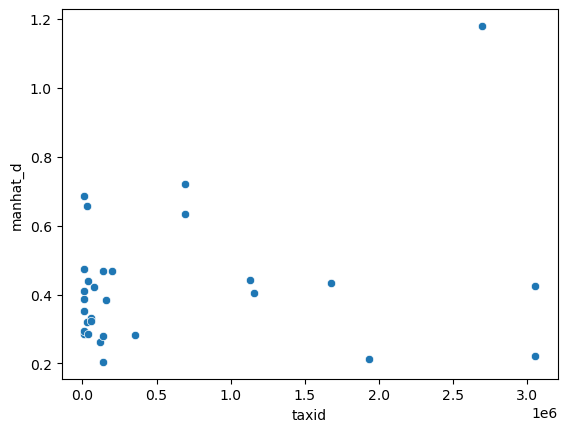

In [28]:
sns.scatterplot(df_aa_distance['manhat_d'])

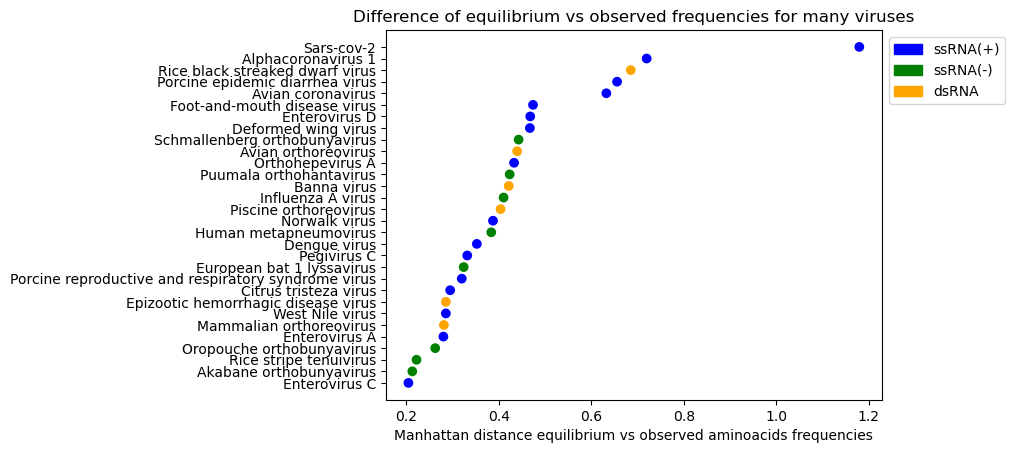

In [29]:
colors = ['blue' if type == '+' else 'green' if type == '-' else 'orange' for type in df_aa_distance.sort_values('manhat_d')['Type'] ]

fig, ax = plt.subplots()

ax.scatter(df_aa_distance['manhat_d'].sort_values(), range(len(df_aa_distance.index)), c=colors)
ax.set_yticks(range(len(df_aa_distance.index)))
ax.set_yticklabels(df_aa_distance.sort_values('manhat_d')['taxname'])
ax.set_xlabel('Manhattan distance equilibrium vs observed aminoacids frequencies')
ax.set_title('Difference of equilibrium vs observed frequencies for many viruses')

legend_labels = {'blue': 'ssRNA(+)', 'green': 'ssRNA(-)', 'orange': 'dsRNA'}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
ax.legend(handles=patches, bbox_to_anchor=(1, 1), loc="upper left")

plt.show()

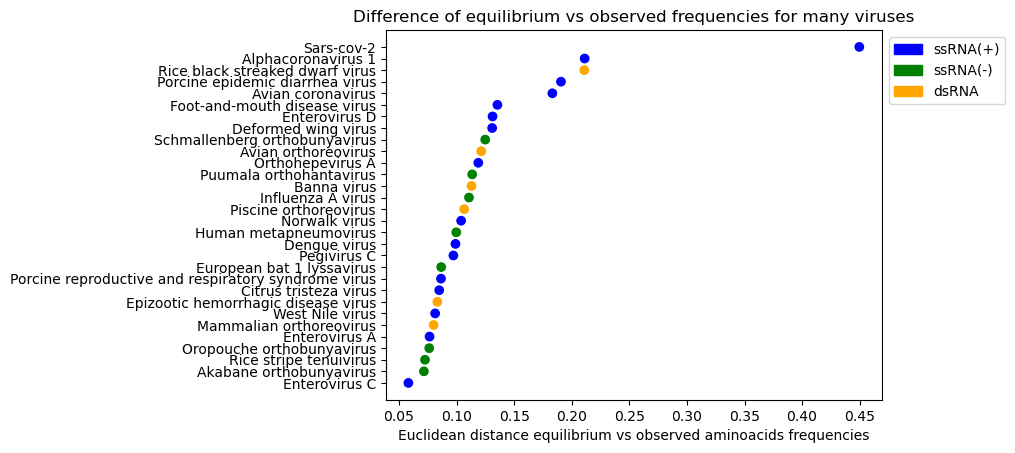

In [30]:
colors = ['blue' if type == '+' else 'green' if type == '-' else 'orange' for type in df_aa_distance.sort_values('manhat_d')['Type'] ]

fig, ax = plt.subplots()

ax.scatter(df_aa_distance['euclid_d'].sort_values(), range(len(df_aa_distance.index)), c=colors)
ax.set_yticks(range(len(df_aa_distance.index)))
ax.set_yticklabels(df_aa_distance.sort_values('manhat_d')['taxname'])
ax.set_xlabel('Euclidean distance equilibrium vs observed aminoacids frequencies')
ax.set_title('Difference of equilibrium vs observed frequencies for many viruses')

legend_labels = {'blue': 'ssRNA(+)', 'green': 'ssRNA(-)', 'orange': 'dsRNA'}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
ax.legend(handles=patches, bbox_to_anchor=(1, 1), loc="upper left")

plt.show()

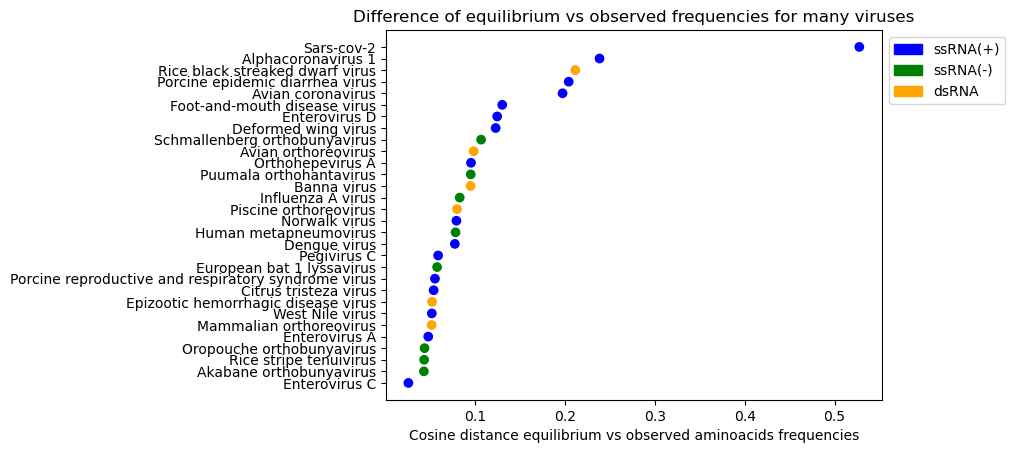

In [31]:
colors = ['blue' if type == '+' else 'green' if type == '-' else 'orange' for type in df_aa_distance.sort_values('manhat_d')['Type'] ]

fig, ax = plt.subplots()

ax.scatter(df_aa_distance['cosine_d'].sort_values(), range(len(df_aa_distance.index)), c=colors)
ax.set_yticks(range(len(df_aa_distance.index)))
ax.set_yticklabels(df_aa_distance.sort_values('manhat_d')['taxname'])
ax.set_xlabel('Cosine distance equilibrium vs observed aminoacids frequencies')
ax.set_title('Difference of equilibrium vs observed frequencies for many viruses')

legend_labels = {'blue': 'ssRNA(+)', 'green': 'ssRNA(-)', 'orange': 'dsRNA'}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
ax.legend(handles=patches, bbox_to_anchor=(1, 1), loc="upper left")

plt.show()

In [32]:
df_aa_distance['manhat_d'].sort_values()

taxid
138950     0.204493
1933178    0.212929
3052763    0.222129
118655     0.262442
138948     0.280188
351073     0.281168
11082      0.285491
40054      0.285562
12162      0.294759
28344      0.319882
57482      0.324043
54290      0.331696
12637      0.352485
162145     0.383629
11983      0.387381
1157337    0.403778
11320      0.410300
77763      0.421484
3052493    0.423506
1678143    0.432910
38170      0.439609
1133363    0.442788
198112     0.467112
138951     0.467881
12110      0.473956
694014     0.632420
28295      0.655672
10990      0.685266
693997     0.719621
2697049    1.179347
Name: manhat_d, dtype: float64

In [33]:
df_aa_freq_all.set_index('taxid').join(df_type.set_index('taxid')[['Type', 'taxname']])[['refseq_id', 'Type', 'taxname']]

,refseq_id,Type,taxname
taxid,,,
10990,GCF_000852945.1,ds,Rice black streaked dwarf virus
11082,GCF_000861085.1,+,West Nile virus
11320,GCF_000865725.1,-,Influenza A virus
1133363,GCF_004789575.1,-,Schmallenberg orthobunyavirus
1157337,GCF_002829625.1,ds,Piscine orthoreovirus
118655,GCF_000853785.1,-,Oropouche orthobunyavirus
11983,GCF_000864005.1,+,Norwalk virus
12110,GCF_002816555.1,+,Foot-and-mouth disease virus
12162,GCF_000862265.1,+,Citrus tristeza virus
